# Aula 01 - Exercício Prático
### Inteligência Artificial - ICT Unifesp

---



## Exercício 1:  Carregar e salvar o dataset
* Abra o arquivo "Iris" do UCI Repository.
* Carregue o dataset no seu código usando a biblioteca
pandas e salve-o em um DataFrame: https://archive.ics.uci.edu/ml/datasets/iris

In [2]:
import pandas as pd

# Criando um DataFrame
#Dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

#Alternativa que tô usando pra testar (Servidor da UCI estava fora do ar)
Dataframe = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

## Exercício 2: Análise inicial dos dados
Exiba as seguintes informações sobre o dataset:
* O número de linhas e colunas.
* O tipo de dado de cada coluna usando .info().
* Estatísticas descritivas usando .describe().

In [4]:
# Imprimindo a quantidade de Linhas e Colunas do DataFrame
# Dataframe.shape retorna uma tupla com o número de linhas e colunas, estilo (X, Y)
Linhas, Colunas = Dataframe.shape
print(f"O DataFrame possui {Linhas} linhas e {Colunas} colunas.")

# Imprimindo os nomes das colunas do DataFrame
print("\nInformações do DataFrame:")
print(Dataframe.info())

# Imprimindo os tipos de dados de cada coluna
print("\nEstatísticas descritivas do DataFrame:")
print(Dataframe.describe())

print(Dataframe)

O DataFrame possui 150 linhas e 5 colunas.

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Estatísticas descritivas do DataFrame:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%     

## Exercício 3: Gráficos
Gere os seguintes gráficos usando a biblioteca matplotlib ou seaborn:
* Um histograma para cada uma das colunas numéricas.
* Um boxplot para as colunas numéricas, segmentadas por espécie.
* Um scatter plot (diagrama de dispersão) relacionando pares de colunas.

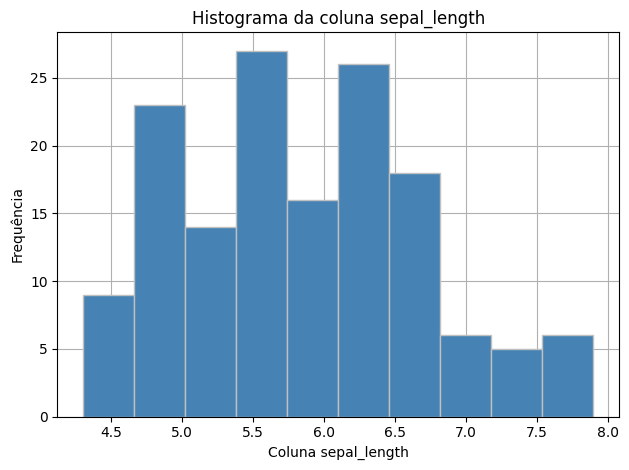

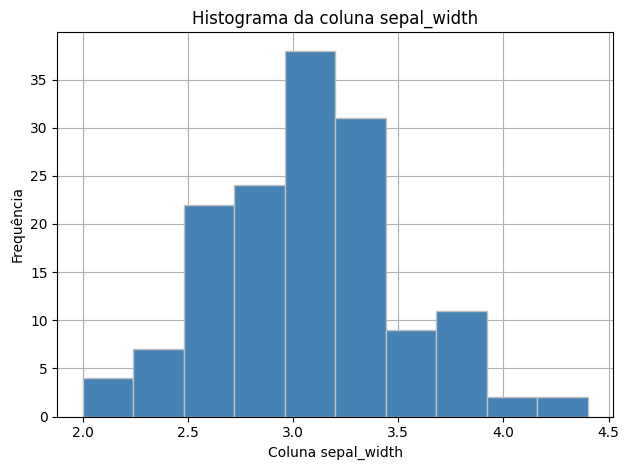

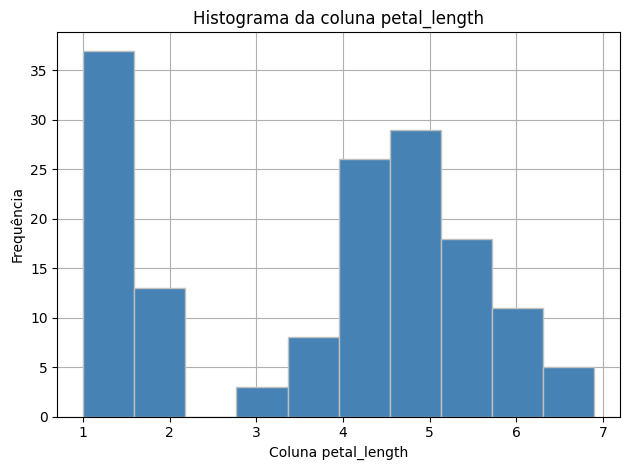

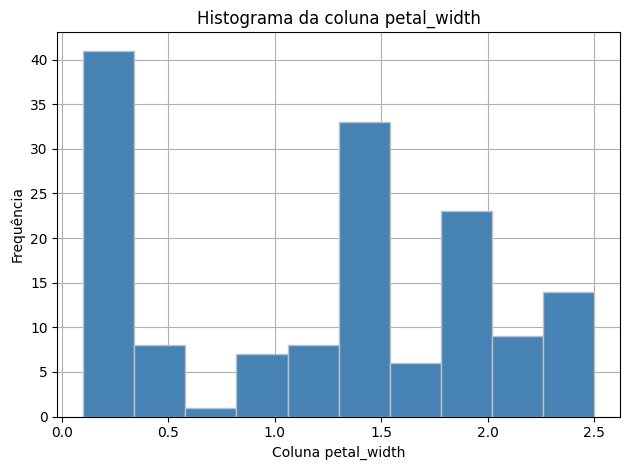

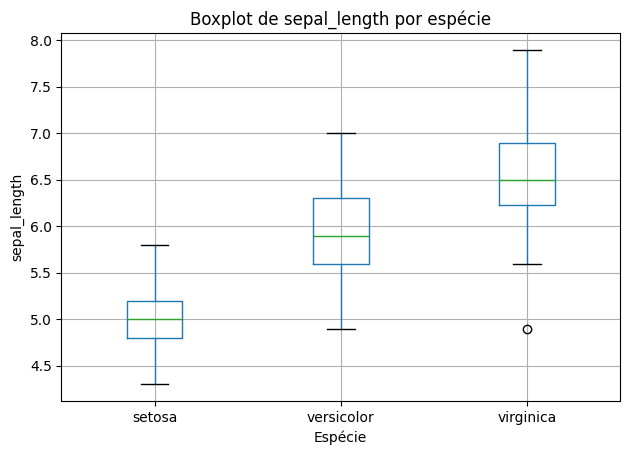

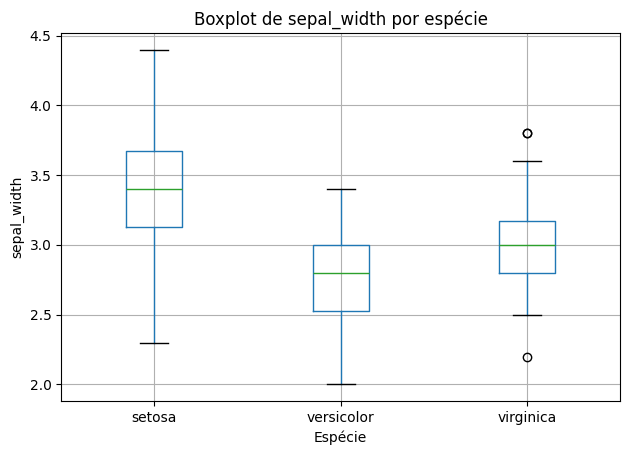

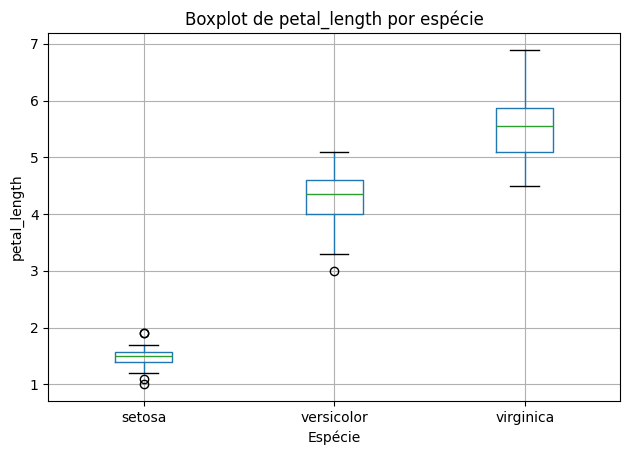

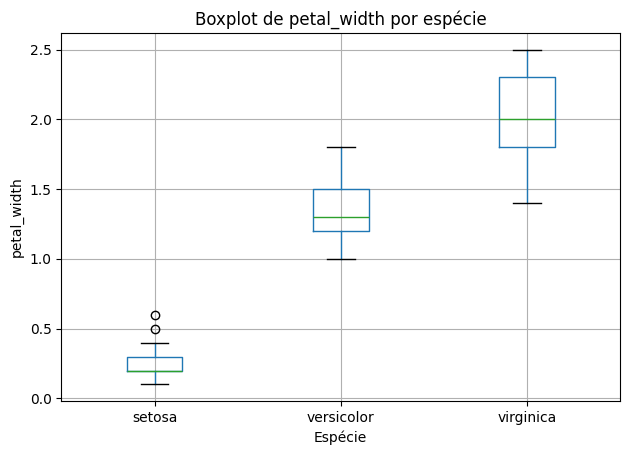

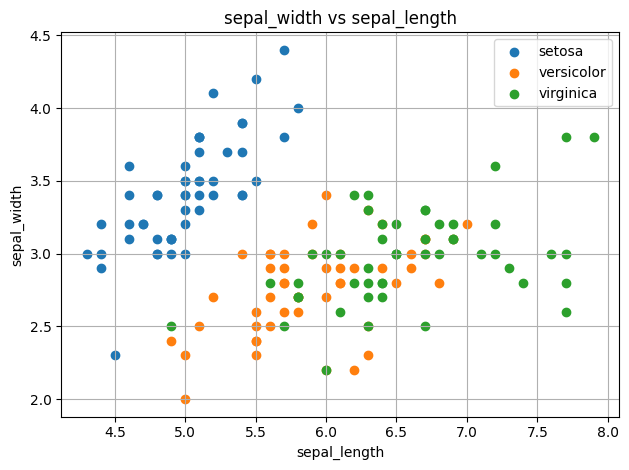

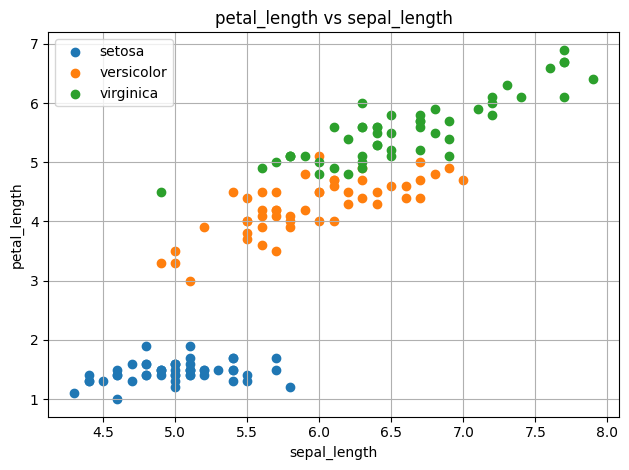

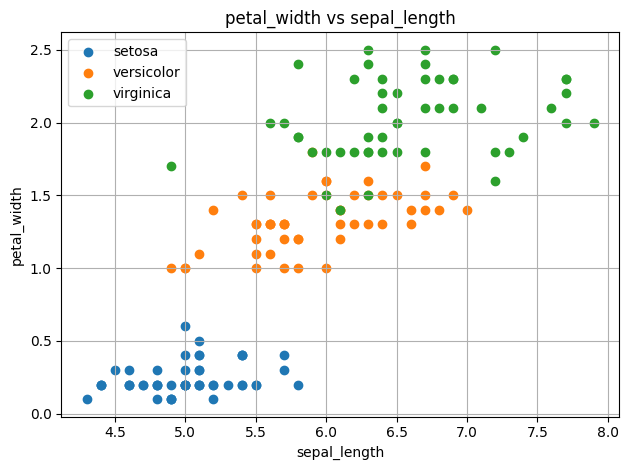

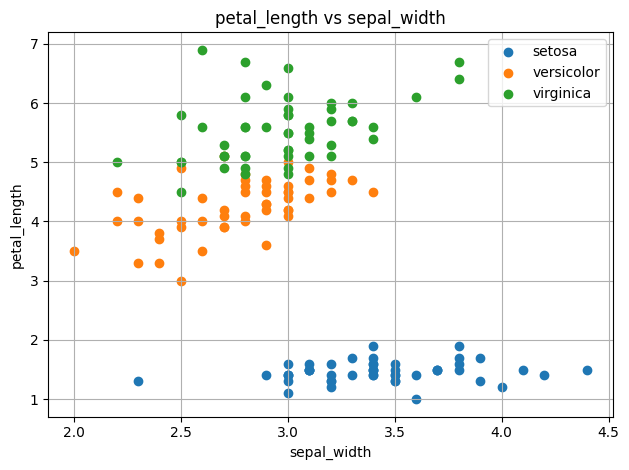

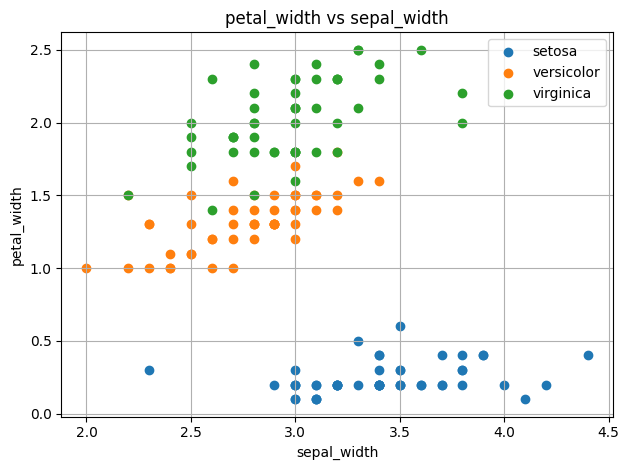

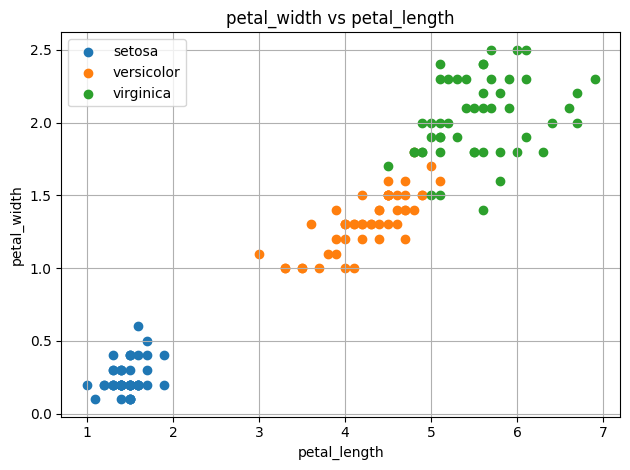

In [6]:
import matplotlib.pyplot as plt

Dataframe.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

ColunasNumericas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for coluna in ColunasNumericas:
  fig, ax = plt.subplots()
  Dataframe[coluna].hist(ax=ax, color='steelblue', edgecolor='silver', bins=10)
  ax.set_axisbelow(True)
  ax.grid(True)
  ax.set_title(f'Histograma da coluna {coluna}')
  ax.set_xlabel(f'Coluna {coluna}')
  ax.set_ylabel('Frequência')
  plt.tight_layout()
  plt.show()


for coluna in ColunasNumericas:
  fig, ax = plt.subplots()
  Dataframe.boxplot(column=coluna, by='species', ax=ax)
  plt.suptitle('')
  ax.set_axisbelow(True)
  ax.grid(True)
  ax.set_title(f'Boxplot de {coluna} por espécie')
  ax.set_xlabel('Espécie')
  ax.set_ylabel(coluna)
  plt.tight_layout()
  plt.show()

for i in range(len(ColunasNumericas)):
    for j in range(i + 1, len(ColunasNumericas)):
        x = ColunasNumericas[i]
        y = ColunasNumericas[j]

        plt.figure()
        for especie in Dataframe['species'].unique():
            dados_filtrados = Dataframe[Dataframe['species'] == especie]
            plt.scatter(dados_filtrados[x], dados_filtrados[y], label=especie)

        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f'{y} vs {x}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


## Exercício 4: Funções para modularização
Transforme cada uma das etapas anteriores em funções reutilizáveis, como:
* load_dataset(file_path) para carregar o dataset.
* dataset_summary(df) para exibir informações e estatísticas básicas.
* plot_histogram(df, column) para criar um histograma.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Criando um DataFrame
#Dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

#Alternativa que tô usando pra testar (Servidor da UCI estava fora do ar)
#Dataframe = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

def CarregarDados(url):
  #Carrega um dataset CSV a partir do caminho especificado.

  #Parâmetros:
  #caminho (str): Caminho do arquivo CSV.

  #Retorna:
  #DataFrame: Pandas DataFrame com os dados carregados.
  return pd.read_csv(url)

Dataframe = CarregarDados("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
Dataframe.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'] # Essa linha existe para garantir os nomes das colunas caso já não venha no CSV

def InformacoesBasicasDataset(Dataframe):
  # Imprime informações básicas do Dataframe
  # Parâmetros:
  # Variável Pandas Dataframe

  # Retorna:
  # Prints com diversas informações do DataFrame

  # Imprimindo a quantidade de Linhas e Colunas do DataFrame
  # Dataframe.shape retorna uma tupla com o número de linhas e colunas, estilo (X, Y)
  Linhas, Colunas = Dataframe.shape
  print(f"O DataFrame possui {Linhas} linhas e {Colunas} colunas.")

  # Imprimindo os nomes das colunas do DataFrame
  print("\nInformações do DataFrame:")
  print(Dataframe.info())

  # Imprimindo os tipos de dados de cada coluna
  print("\nEstatísticas descritivas do DataFrame:")
  print(Dataframe.describe())

ColunasNumericas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # Declara-se fora para evitar múltiplas chamadas de criação
def PlotarHistograma(Dataframe, ColunasNumericas):
  # Plota Histogramas baseados nas Colunas Informadas no Parâmetro "ColunasNumericas" e nos dados do Dataframe
  for coluna in ColunasNumericas:
    fig, ax = plt.subplots()
    Dataframe[coluna].hist(ax=ax, color='steelblue', edgecolor='silver', bins=10)
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.set_title(f'Histograma da coluna {coluna}')
    ax.set_xlabel(f'Coluna {coluna}')
    ax.set_ylabel('Frequência')
    plt.tight_layout()
    plt.show()

def BoxPlots(Dataframe, ColunasNumericas):
  # Plota BoxPlots baseados nas Colunas Informadas no Parâmetro "ColunasNumericas" e nos dados do Dataframe
  for coluna in ColunasNumericas:
    fig, ax = plt.subplots()
    Dataframe.boxplot(column=coluna, by='species', ax=ax)
    plt.suptitle('')
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.set_title(f'Boxplot de {coluna} por espécie')
    ax.set_xlabel('Espécie')
    ax.set_ylabel(coluna)
    plt.tight_layout()
    plt.show()

def ScatterPlots(Dataframe, ColunasNumericas):
  # Faz Scatter Plots baseados nas Colunas Informadas no Parâmetro "ColunasNumericas" e nos dados do Dataframe
  for i in range(len(ColunasNumericas)):
      for j in range(i + 1, len(ColunasNumericas)):
          x = ColunasNumericas[i]
          y = ColunasNumericas[j]

          plt.figure()
          for especie in Dataframe['species'].unique():
              dados_filtrados = Dataframe[Dataframe['species'] == especie]
              plt.scatter(dados_filtrados[x], dados_filtrados[y], label=especie)

          plt.xlabel(x)
          plt.ylabel(y)
          plt.title(f'{y} vs {x}')
          plt.legend()
          plt.grid(True)
          plt.tight_layout()
          plt.show()



## Exercício 5: Documentação do código
Use docstrings para documentar cada função.


## Referências utilizadas:
* [W3Schools - Pandas](https://www.w3schools.com/python/pandas/default.asp)
* [W3Schools - MatPlotLib](https://www.w3schools.com/python/matplotlib_histograms.asp)
* [Colab - Joel Frank](https://colab.research.google.com/drive/1cAufE6L_AnqiKXDNdCOOvfHa4SXpNYlY)
* [DataSet](https://archive.ics.uci.edu/dataset/53/iris)